selection:  [0.04187654, 0.04793854, 0.06678526, 0.06888427, 0.19554974, 0.21608086, 0.35034027, 0.39117924, 0.45971913, 0.49662469, 0.49763083, 0.6031924, 0.60968199, 0.78707064, 0.78948369, 0.87624042, 0.95223481, 1.15240899, 1.18349663, 1.42705005, 1.4793832, 1.59520448, 1.68480967, 1.72073167, 1.73972778]
median:
 0.60968199
size:
 1.6978512399999999
assimmetry koefficient:
 0.3738844510017025


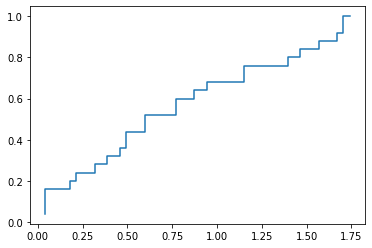

0.7773330315999999

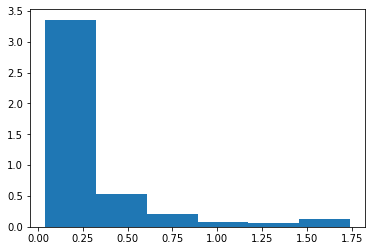

In [69]:
import matplotlib.pyplot as plt
import random as rd
import numpy as np
from math import exp
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm

#Использую сгенерированную выборку
selection = [0.04187654, 0.04793854, 0.06678526, 0.06888427, 0.19554974, 0.21608086, 0.35034027, 0.39117924,
             0.45971913, 0.49662469, 0.49763083, 0.6031924, 0.60968199, 0.78707064, 0.78948369, 0.87624042,
            0.95223481, 1.15240899, 1.18349663, 1.42705005, 1.4793832, 1.59520448, 1.68480967, 1.72073167,
            1.73972778]


#Пункт а
print("selection: ", selection)
print("median:\n", np.median(selection))
size = max(selection) - min(selection)
print("size:\n", size)
variance = stats.moment(selection, 2, axis=None)
center_moment3 = stats.moment(selection, 3, axis=None)
ass_koef = center_moment3 / (variance ** 1.5)
print("assimmetry koefficient:\n", ass_koef)

#Пункт б
#Функция распределения
ecdf = sm.distributions.ECDF(selection)
x = np.linspace(min(selection), max(selection))
y = ecdf(x)
plt.step(x, y)
plt.show()

#Гистограмма
N_intervals = 6
interval_range = size / N_intervals

plt.hist(selection, bins=int(N_intervals), weights=np.ones_like(selection) / len(selection) / selection)
np.mean(selection)



<Axes: >

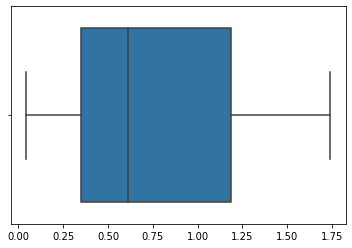

In [70]:
#boxplot
sns.boxplot(x = selection)

In [71]:
def bootstrap(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]

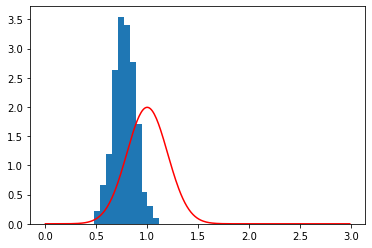

In [72]:
btstrp = bootstrap(selection)
btstrp_mean = []
for i in range(1000):
    btstrp_mean.append(btstrp[i].mean())
interval_size = (max(btstrp_mean) - min(btstrp_mean)) / 11
plt.hist(btstrp_mean, bins=11, weights=np.ones_like(btstrp_mean) / len(btstrp_mean) / interval_size)
x = np.arange(0, 3, 0.01)
plt.plot(x, norm.pdf(x, 1, 1/5), color = "red")
plt.show()

(array([0.02468975, 0.10863488, 0.37528413, 0.83945135, 1.30361856,
        1.19498368, 0.64687133, 0.32590464, 0.10369693, 0.0098759 ,
        0.00493795]),
 array([-0.61544577, -0.41293254, -0.21041932, -0.00790609,  0.19460713,
         0.39712036,  0.59963358,  0.80214681,  1.00466003,  1.20717326,
         1.40968648,  1.61219971]),
 <BarContainer object of 11 artists>)

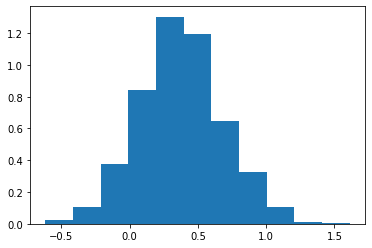

In [73]:
btstrp = bootstrap(selection)
btstrp_ass_koef = []
for i in range(1000):
    mean = np.mean(btstrp[i])
    variance = stats.moment(btstrp[i], 2, axis=None)
    center_moment3 = stats.moment(btstrp[i], 3, axis=None)
    ass_koef = center_moment3 / (variance ** 1.5)
    btstrp_ass_koef.append(ass_koef)
interval_size = (max(btstrp_ass_koef) - min(btstrp_ass_koef)) / 11
plt.hist(btstrp_ass_koef, bins=11, weights=np.ones_like(btstrp_ass_koef) / len(btstrp_ass_koef) / interval_size)

<function matplotlib.pyplot.show(close=None, block=None)>

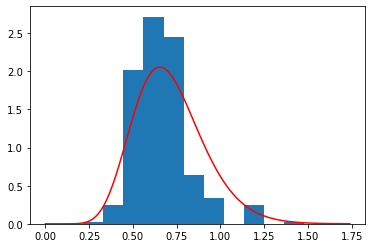

In [74]:
def x13(x):
  return 25 * 2704156 * np.exp(-13 * x) * (1 - np.exp(-x)) ** 12

btstrp = bootstrap(selection)
btstrp_med = []
for i in range(1000):
    btstrp_med.append(np.median(btstrp[i]))
interval_size = (max(btstrp_med) - min(btstrp_med)) / 11
x_coord = np.linspace(0, selection[-1], 100)
y_coord = x13(x_coord)
plt.hist(btstrp_med, bins=11, weights=np.ones_like(btstrp_med) / len(btstrp_med) / interval_size)
plt.plot(x_coord, y_coord, color = "red")
plt.show

(array([0.84813084, 0.84813084, 0.56542056, 0.28271028, 0.28271028,
        0.7067757 ]),
 array([0.04187654, 0.32485175, 0.60782695, 0.89080216, 1.17377737,
        1.45675257, 1.73972778]),
 <BarContainer object of 6 artists>)

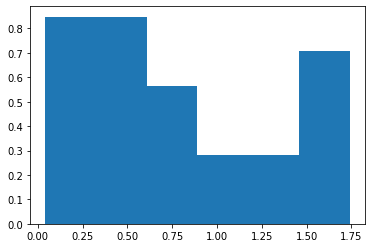

In [75]:
lst = []
plt.hist(selection, bins=int(N_intervals), weights=np.ones_like(selection) / len(selection) / interval_range)